In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# remember pip install for category encoders

# More guidance at https://towardsdatascience.com/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6

In [195]:
df = pd.read_csv('weatherAUS.csv')

In [196]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [198]:
df.shape

# 145460 rows, 23 columns.

(145460, 23)

In [199]:
df.describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


In [200]:
df['Location'].value_counts()


Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [201]:
df['Location'].nunique()

49

In [202]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

<Axes: title={'center': 'Count plot of RainTomorrow'}, xlabel='RainTomorrow', ylabel='count'>

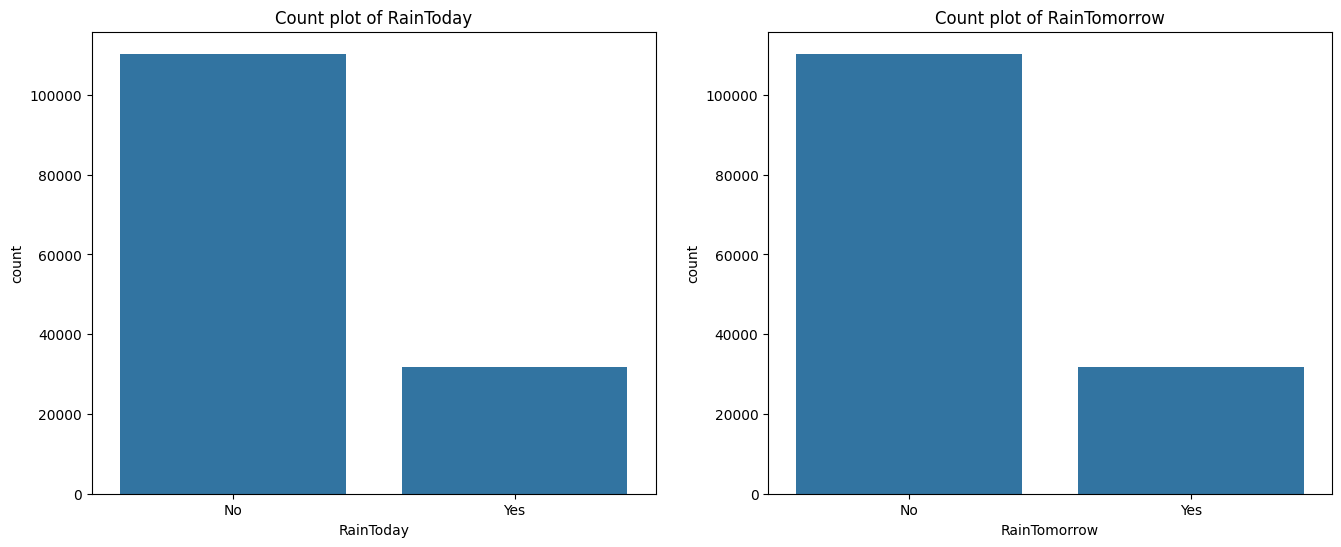

In [203]:
fig, ax= plt.subplots(1,2, figsize=(16,6))
ax[0].set(ylabel='count', title='Count plot of RainToday')
ax[1].set(ylabel='count', title='Count plot of RainTomorrow')

sns.countplot(data=df, x='RainToday', ax=ax[0])
sns.countplot(data=df, x='RainTomorrow', ax=ax[1])

In [204]:
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


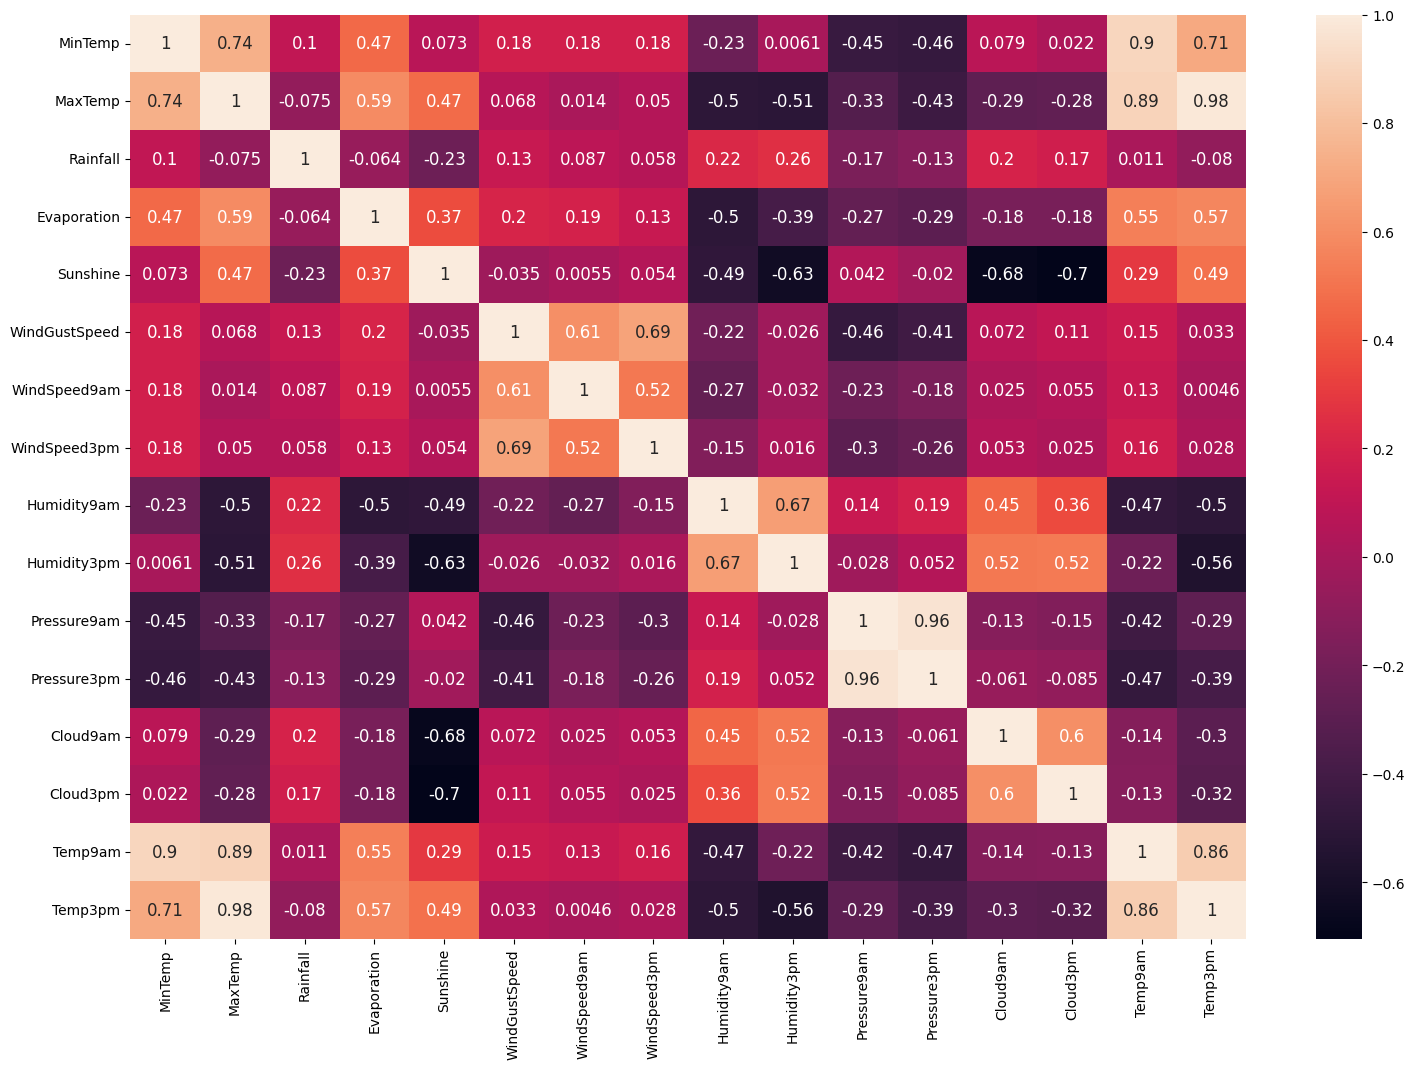

In [205]:
# Let's eyeball some correlations between the 16 floaters.

float_cols = df.select_dtypes(include=['float64'])

corr_matrix_1 = float_cols.corr()
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr_matrix_1, annot=True, annot_kws={'fontsize': 12})
plt.show()

In [206]:
df.isnull().sum()
df.columns[df.isnull().any()]
# Below columns have missing data points.

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [207]:
df.loc[df.duplicated()]
# No duplicates. Imagine two rows containing the exact same data. 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [208]:
# How many nulls?
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Imputation Methods for sorting out nulls:

Mean/median imputation: Replace missing values with the mean or median of the non-missing values in that column.
Mode imputation: Replace with the most frequent value.
Forward/backward fill: Fill missing values with values from previous or subsequent observations.
Predictive model imputation: Use more sophisticated models (e.g., regression, KNN) to estimate missing values.

So which one?
Mean imputation: Suitable for approximately normally distributed data.
Median imputation: More robust to skew and outliers than mean imputation.
Mode imputation: Ideal for categorical data (e.g. objects)

In [209]:
# Suggest mode imputation for object. 
# Need to check float variables with histograms or compare CTs on df.describe to see distributions before I can decide with those. 

In [210]:
float_cols = df.select_dtypes(include=['float64'])

float_cols.describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


In [211]:
float_cols.mode()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,11.0,20.0,0.0,4.0,0.0,35.0,9.0,13.0,99.0,52.0,1016.4,1015.3,7.0,7.0,17.0,20.0


In [212]:
object_cols = df.select_dtypes(include=['object']).columns

df[object_cols].mode(dropna=True)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2013-03-01,Canberra,W,N,SE,No,No
1,2013-03-02,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-03,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-03-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-03-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1567,2017-06-20,NaN,NaN,NaN,NaN,NaN,NaN
1568,2017-06-21,NaN,NaN,NaN,NaN,NaN,NaN
1569,2017-06-22,NaN,NaN,NaN,NaN,NaN,NaN
1570,2017-06-23,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
# MinTemp & MaxTemp = CTM's close so mean imputation. (CTM = central tendency measure, i.e. mean & median)

# Rainfall - higher mean than median = positive skew = median imputation

# Evaporation & Sunshine - A few outliers but slight positive skew due to median being lower than mean = median imputation.

# WindGustSpeed = CTMs close so mean imputation.

# WindSpeed 9am & 3pm = mean imputation

# Humidity 9am & 3pm = mean imputation 

# Pressure 9am & 3pm = mean imputation

# Cloudy 9am & 3pm = slight negative skew due to median being higher than mean = median imputation

# Temp 9am & 3pm = CTMs close together so mean imputation. 

## All categorical 'object' variables should undergo mode imputation. 

### Histograms turned out weird so decided on imputation method by eyeballing CTMs instead to save time. Let's check with some other graphs before concluding.  

Text(0.5, 1.0, 'WindSpeed3pm')

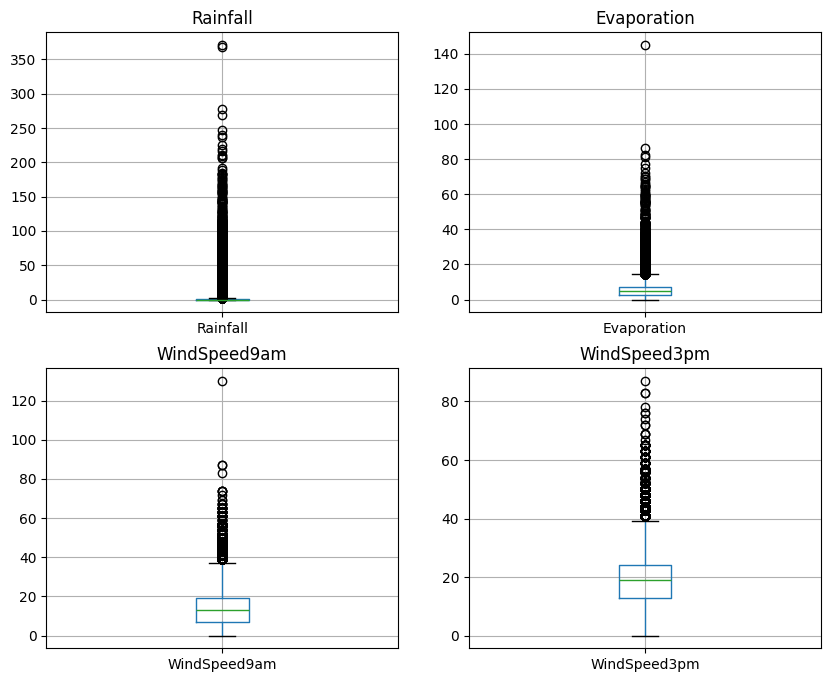

In [214]:

fig, ax = plt.subplots(2,2, figsize=(10,8))
df.boxplot(column='Rainfall', ax=ax[0, 0])
ax[0, 0].set_title('Rainfall')

df.boxplot(column='Evaporation', ax=ax[0, 1])
ax[0, 1].set_title('Evaporation')

df.boxplot(column='WindSpeed9am', ax=ax[1,0])
ax[1,0].set_title('WindSpeed9am')

df.boxplot(column='WindSpeed3pm', ax=ax[1,1])
ax[1,1].set_title('WindSpeed3pm')

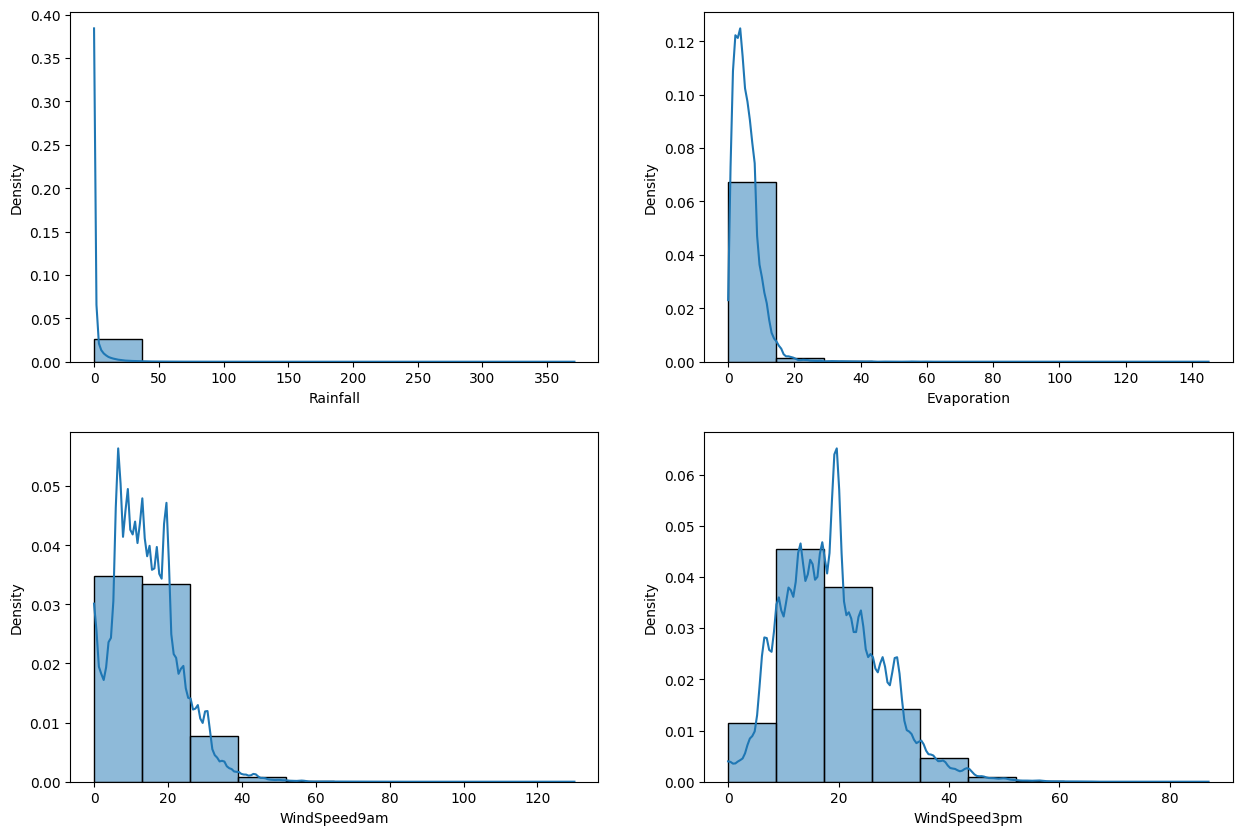

In [215]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
sns.histplot(df['Rainfall'], bins=10, kde=True, stat='density');


plt.subplot(2, 2, 2)
sns.histplot(df['Evaporation'], bins=10, kde=True, stat='density');


plt.subplot(2, 2, 3)
sns.histplot(df['WindSpeed9am'], bins=10, kde=True, stat='density');


plt.subplot(2, 2, 4)
sns.histplot(df['WindSpeed3pm'], bins=10, kde=True, stat='density');

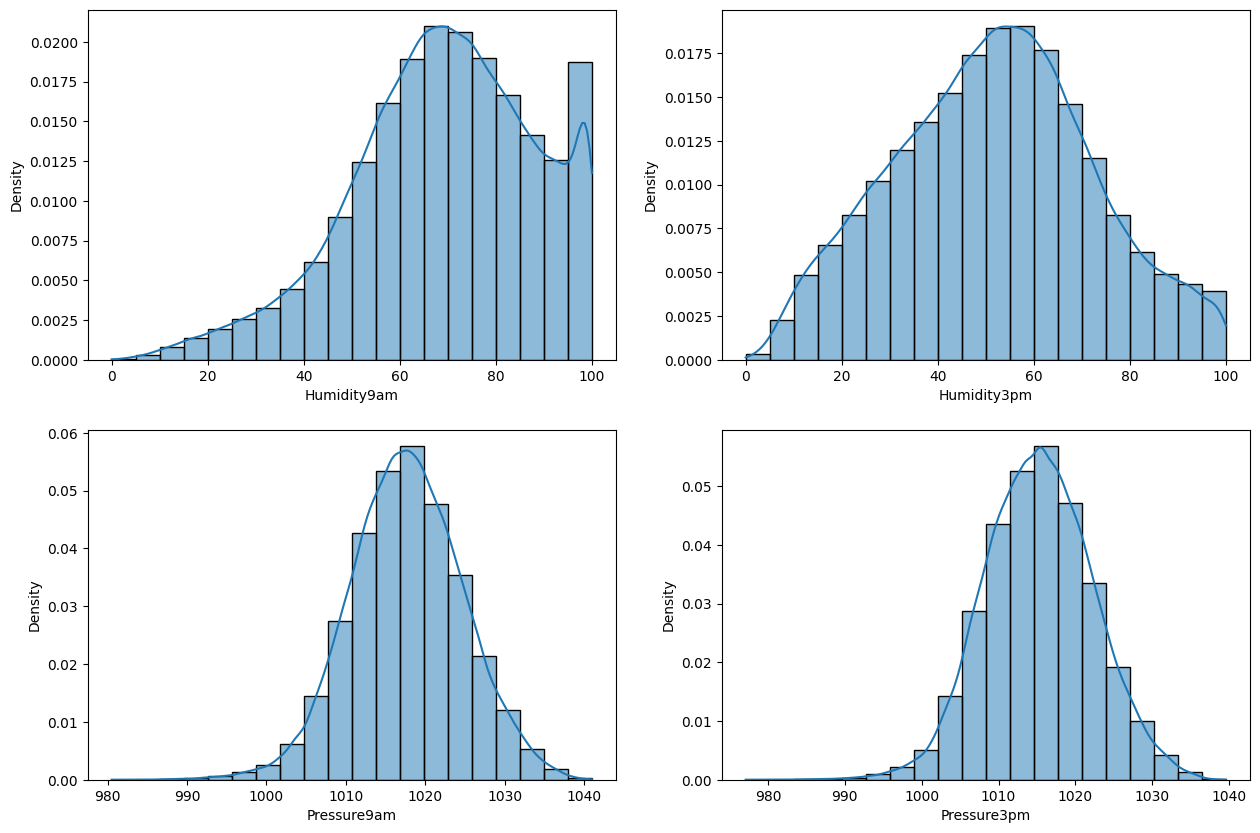

In [216]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
sns.histplot(df['Humidity9am'], bins=20, kde=True, stat='density');


plt.subplot(2, 2, 2)
sns.histplot(df['Humidity3pm'], bins=20, kde=True, stat='density');


plt.subplot(2, 2, 3)
sns.histplot(df['Pressure9am'], bins=20, kde=True, stat='density');


plt.subplot(2, 2, 4)
sns.histplot(df['Pressure3pm'], bins=20, kde=True, stat='density');

In [217]:
# plt.figure(figsize=(15,10)) # Comparing to above, count vs frequency
 
# plt.subplot(2, 2, 1)
# fig = df.Rainfall.hist(bins=5)
# fig.set_xlabel('Humidity9am')
# fig.set_ylabel('Count')


# plt.subplot(2, 2, 2)
# fig = df.Evaporation.hist(bins=5)
# fig.set_xlabel('Humidity3pm')
# fig.set_ylabel('Count')


# plt.subplot(2, 2, 3)
# fig = df.WindSpeed9am.hist(bins=20)
# fig.set_xlabel('Pressure9am')
# fig.set_ylabel('Count')


# plt.subplot(2, 2, 4)
# fig = df.WindSpeed3pm.hist(bins=20)
# fig.set_xlabel('Pressure3pm')
# fig.set_ylabel('Count')

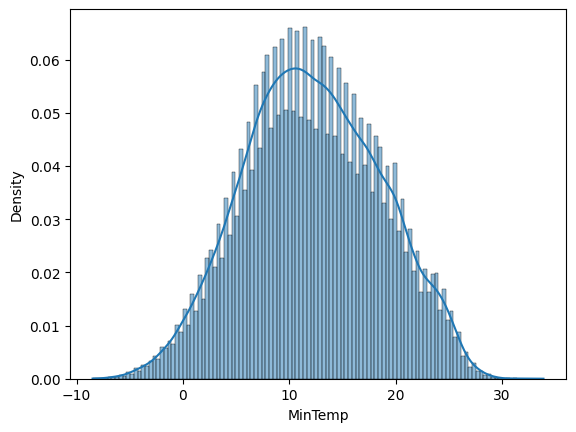

In [218]:
sns.histplot(df['MinTemp'], kde=True, stat='density');

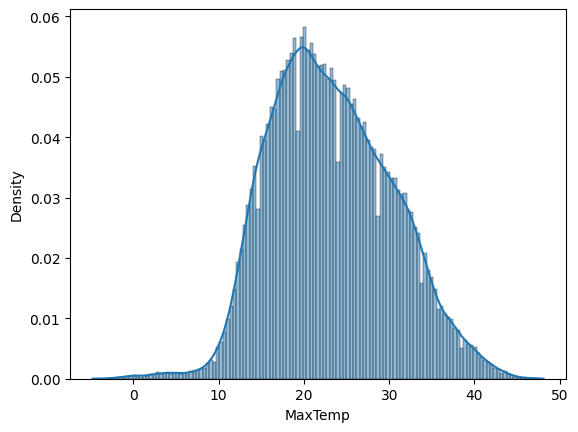

In [219]:
sns.histplot(df['MaxTemp'], kde=True, stat='density');

In [220]:
# Commencing imputations as discussed above. Graphs show skew so median imputation for a lot of them.

df['MinTemp'].fillna(df['MinTemp'].mean(skipna=True), inplace=True) # add inplace=True so that the imputation overwrites the columns in the current dataframe. 
df['MaxTemp'].fillna(df['MaxTemp'].mean(skipna=True), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(skipna=True), inplace=True)


df['Humidity9am'].fillna(df['Humidity9am'].median(skipna=True), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(skipna=True), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(skipna=True), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(skipna=True), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(skipna=True), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(skipna=True), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(skipna=True), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(skipna=True), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(skipna=True), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(skipna=True), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(skipna=True), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(skipna=True), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(skipna=True), inplace=True)

df['Location'].fillna(df['Location'].mode().iloc[0], inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode().iloc[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode().iloc[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode().iloc[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode().iloc[0], inplace=True)

# Vaish had another method detailed below for the floaters:

# numerical = [col for col in X_train.columns if X_train[col].dtype != 'O']

# for df1 in [X_train, X_test]:
#    for col in numerical: 
#        col_median = X_train[col].median()
#        df1[col].fillna(col_median, inplace=True)

In [221]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,4.8,8.4,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,4.8,8.4,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,4.8,8.4,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,4.8,8.4,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,4.8,8.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,Yes,No


In [222]:
df.isnull().sum()
# RainTomorrow is the only one left with nulls and it is the target variable so it doesn't matter if we have nulls there, I presume? 
# We'll drop it from the table when doing the logistic regression anyways won't we?

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

In [223]:
df['Location'].value_counts() # Making sure I haven't accidentally replaced every Location with the mode. 

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [224]:
# Just realized I need to convert dates to a date time because it's currently an object.

df['Date'] = pd.to_datetime(df['Date']) # Turns out Pandas has a function to do exactly that but you have to do it for Year, Month & Day separately. 

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# date_cols = df(['Year', 'Month', 'Day']) - not working, coded out.

date_y = df['Year'].value_counts()
date_m = df['Month'].value_counts()
date_d = df['Day'].value_counts()

date_values = pd.concat([date_y, date_m, date_d], axis=1, keys=['Years', 'Months', 'Days'])
print(date_values)

        Years   Months    Days
2016  17934.0      NaN     NaN
2014  17885.0      NaN     NaN
2015  17885.0      NaN     NaN
2009  16789.0      NaN     NaN
2010  16782.0      NaN     NaN
2013  16415.0      NaN     NaN
2012  15409.0      NaN     NaN
2011  15407.0      NaN     NaN
2017   8623.0      NaN     NaN
2008   2270.0      NaN     NaN
2007     61.0      NaN     NaN
3         NaN  13361.0  4786.0
5         NaN  13353.0  4786.0
1         NaN  13236.0  4786.0
6         NaN  12684.0  4786.0
8         NaN  12028.0  4786.0
10        NaN  12028.0  4786.0
7         NaN  12025.0  4786.0
11        NaN  11669.0  4786.0
9         NaN  11640.0  4786.0
4         NaN  11550.0  4786.0
12        NaN  11093.0  4786.0
2         NaN  10793.0  4786.0
13        NaN      NaN  4786.0
23        NaN      NaN  4786.0
22        NaN      NaN  4786.0
21        NaN      NaN  4786.0
20        NaN      NaN  4786.0
19        NaN      NaN  4786.0
18        NaN      NaN  4786.0
17        NaN      NaN  4786.0
15      

In [225]:
# Time to drop 'RainTomorrow'and start encoding the categorical variables into integers?

import category_encoders as ce
# Logistic regression from this point onwards. Pair-programming with Louise & Catherine took up this time, maybe complete later in own time. 